# Imports

In [496]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm 
from pylab import rcParams
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
import warnings

warnings.filterwarnings("ignore")

# Read data 

In [497]:
df=pd.read_csv('masked_kiva_loans.csv')
df.head(n=10)

,id,funded_amount,loan_amount,sector,country,partner_id,term_in_months,lender_count,borrower_genders,repayment_interval,date
0,1242201,500,500,Agriculture,Pakistan,245.0,14,14,female,monthly,2/20/2017
1,1165778,325,325,Agriculture,Philippines,145.0,14,13,female,irregular,10/11/2016
2,1123052,800,800,Agriculture,Ecuador,159.0,14,29,female,bullet,7/25/2016
3,1312344,425,425,Agriculture,Philippines,136.0,8,1,female,irregular,6/2/2017
4,861422,275,275,Agriculture,Kenya,133.0,12,11,female,monthly,3/25/2015
5,864504,350,350,Agriculture,Pakistan,245.0,14,14,female,monthly,3/31/2015
6,1023952,200,200,Agriculture,Philippines,145.0,7,8,female,irregular,2/17/2016
7,690323,575,575,Agriculture,Georgia,181.0,15,20,female,monthly,3/28/2014
8,749263,325,325,Agriculture,Nigeria,288.0,17,13,female,bullet,8/4/2014
9,928716,500,500,Agriculture,Kenya,156.0,16,10,female,monthly,8/6/2015


In [498]:
df.tail(n=10)

,id,funded_amount,loan_amount,sector,country,partner_id,term_in_months,lender_count,borrower_genders,repayment_interval,date
33551,1279042,1675,1675,Wholesale,Uganda,222.0,7,59,"male, male, male, male, male, male, female, ma...",monthly,4/13/2017
33552,1031585,3975,3975,Wholesale,Uganda,290.0,19,156,male,monthly,3/1/2016
33553,874207,250,250,Wholesale,Philippines,126.0,8,5,female,irregular,4/23/2015
33554,847852,100,100,Wholesale,Philippines,126.0,8,4,female,irregular,2/27/2015
33555,1178300,350,350,Wholesale,Pakistan,247.0,14,12,female,monthly,11/1/2016
33556,886976,500,500,Wholesale,Pakistan,247.0,14,18,female,monthly,5/18/2015
33557,1017003,300,300,Wholesale,Pakistan,247.0,12,12,female,irregular,2/2/2016
33558,831649,225,225,Wholesale,Pakistan,421.0,14,9,female,monthly,1/23/2015
33559,920920,2000,2000,Wholesale,Palestine,80.0,27,54,male,monthly,7/21/2015
33560,931675,750,750,Wholesale,Pakistan,247.0,12,27,"female, female",irregular,8/13/2015


# data description

In [499]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33561 entries, 0 to 33560
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  33561 non-null  int64  
 1   funded_amount       33561 non-null  int64  
 2   loan_amount         33561 non-null  int64  
 3   sector              33561 non-null  object 
 4   country             33561 non-null  object 
 5   partner_id          32927 non-null  float64
 6   term_in_months      33561 non-null  int64  
 7   lender_count        33561 non-null  int64  
 8   borrower_genders    33366 non-null  object 
 9   repayment_interval  33561 non-null  object 
 10  date                33561 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 2.8+ MB


In [500]:
df.describe()

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,3.356100e+04,33561.000000,33561.000000,32927.000000,33561.000000,33561.000000
mean,9.931834e+05,789.871279,843.059653,177.819145,13.691428,20.549179
std,1.965757e+05,1177.245363,1222.188679,93.838691,8.566574,28.514324
min,6.530490e+05,0.000000,25.000000,9.000000,1.000000,0.000000
25%,8.217790e+05,250.000000,275.000000,126.000000,8.000000,7.000000
50%,9.945450e+05,450.000000,500.000000,145.000000,13.000000,13.000000
75%,1.164156e+06,900.000000,975.000000,204.000000,14.000000,24.000000
max,1.340239e+06,50000.000000,50000.000000,533.000000,145.000000,1481.000000


# Checking unique values of string objects

In [501]:
print(df['borrower_genders'].value_counts())
print(df['repayment_interval'].value_counts())
print(df['sector'].value_counts())

borrower_genders
female                                                                                                                                                                                                              21264
male                                                                                                                                                                                                                 6784
female, female                                                                                                                                                                                                        602
female, female, female                                                                                                                                                                                                584
female, female, female, female                                                                                 

# dropping unnecessary columns 

In [502]:
df.drop(columns=['borrower_genders','partner_id'],inplace=True)

# checking nulls

In [503]:
df.isna().sum()

id                    0
funded_amount         0
loan_amount           0
sector                0
country               0
term_in_months        0
lender_count          0
repayment_interval    0
date                  0
dtype: int64

In [504]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33561 entries, 0 to 33560
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  33561 non-null  int64 
 1   funded_amount       33561 non-null  int64 
 2   loan_amount         33561 non-null  int64 
 3   sector              33561 non-null  object
 4   country             33561 non-null  object
 5   term_in_months      33561 non-null  int64 
 6   lender_count        33561 non-null  int64 
 7   repayment_interval  33561 non-null  object
 8   date                33561 non-null  object
dtypes: int64(5), object(4)
memory usage: 2.3+ MB


# Checking duplicate values

In [505]:
df.duplicated().sum()



0

# Drop unnecessary columns

In [506]:
df.drop(columns='id',inplace=True)
df.head()




,funded_amount,loan_amount,sector,country,term_in_months,lender_count,repayment_interval,date
0,500,500,Agriculture,Pakistan,14,14,monthly,2/20/2017
1,325,325,Agriculture,Philippines,14,13,irregular,10/11/2016
2,800,800,Agriculture,Ecuador,14,29,bullet,7/25/2016
3,425,425,Agriculture,Philippines,8,1,irregular,6/2/2017
4,275,275,Agriculture,Kenya,12,11,monthly,3/25/2015


# Checking outiers 

In [507]:
Q1 = df['funded_amount'].quantile(0.25)
Q3 = df['funded_amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
outliers = df[(df['funded_amount'] <lower_bound) | (df['funded_amount'] > upper_bound)]
outliers.head()


,funded_amount,loan_amount,sector,country,term_in_months,lender_count,repayment_interval,date
55,3900,3900,Agriculture,Kenya,11,130,bullet,2/11/2014
61,2000,2000,Agriculture,Armenia,27,71,monthly,11/19/2014
122,3150,3150,Agriculture,Peru,8,73,monthly,5/16/2016
135,2050,2050,Agriculture,Vietnam,14,71,monthly,11/21/2016
151,1925,1925,Agriculture,Rwanda,10,50,bullet,4/2/2015


# Outliers percentage

In [508]:
print(outliers.shape[0]/df.shape[0])

0.08313220702601233


In [509]:
# without_outliers=df['funded_amount'][(df['funded_amount'] >= lower_bound) & (df['funded_amount'] <= upper_bound)]
# without_outliers_mean = without_outliers.mean()
# df['funded_amount'] = df['funded_amount'].mask((df['funded_amount'] < lower_bound) | (df['funded_amount'] > upper_bound), without_outliers_mean)


In [510]:
# Q1 = df['loan_amount'].quantile(0.25)
# Q3 = df['loan_amount'].quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 - (1.5 * IQR)
# upper_bound = Q3 + (1.5 * IQR)
# outliers = df[(df['loan_amount'] <lower_bound) | (df['loan_amount'] > upper_bound)]
# without_outliers=df['loan_amount'][(df['loan_amount'] >= lower_bound) & (df['loan_amount'] <= upper_bound)]
# without_outliers_mean = without_outliers.mean()
# df['loan_amount'] = df['loan_amount'].mask((df['loan_amount'] < lower_bound) | (df['loan_amount'] > upper_bound), without_outliers_mean)

# Ploting the relation between sector and funded_amount

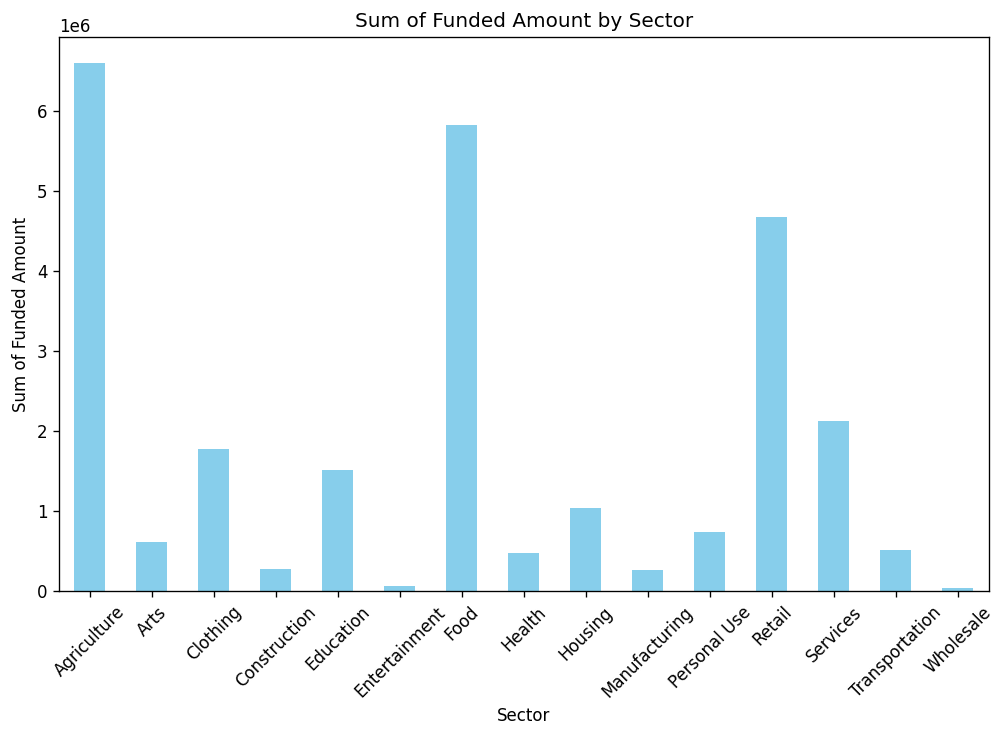

In [511]:


# Group by 'sector' and sum 'funded_amount'
sector_funding = df.groupby('sector')['funded_amount'].sum()

# Plotting
plt.figure(figsize=(10, 6))
sector_funding.plot(kind='bar', color='skyblue')
plt.title('Sum of Funded Amount by Sector')
plt.xlabel('Sector')
plt.ylabel('Sum of Funded Amount')
plt.xticks(rotation=45)
plt.show()


# Relationship between Funded Amount and Number of Lenders

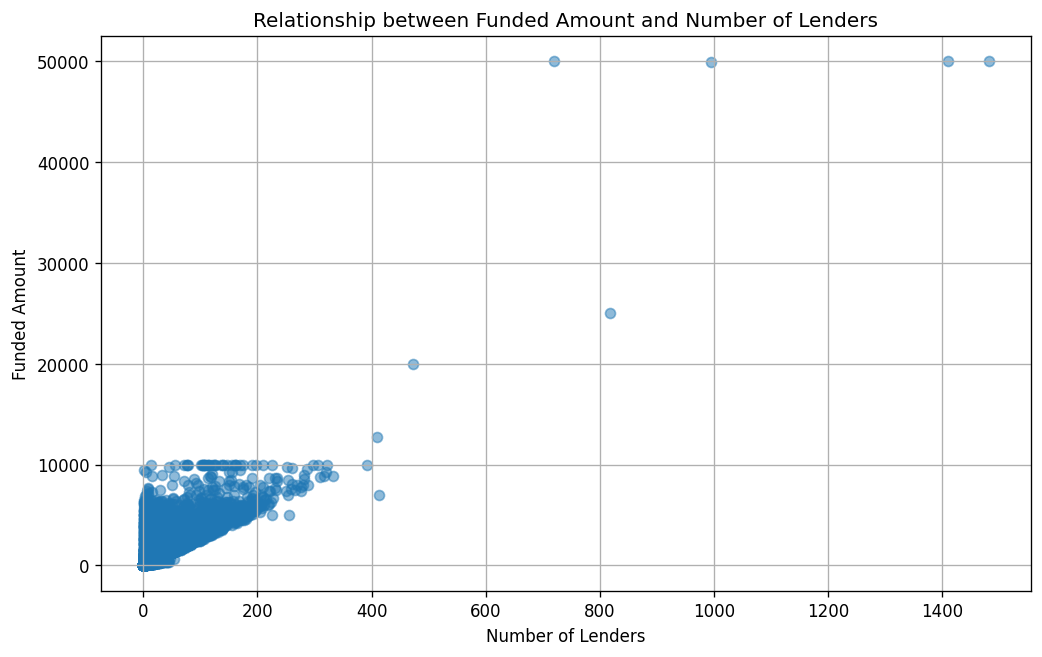

In [512]:
plt.figure(figsize=(10, 6))
plt.scatter(df['lender_count'], df['funded_amount'], alpha=0.5)
plt.title('Relationship between Funded Amount and Number of Lenders')
plt.xlabel('Number of Lenders')
plt.ylabel('Funded Amount')
plt.grid(True)
plt.show()


# Save Cleaned data

In [513]:
df.to_csv("cleaned_data.csv")

# encode string data

In [514]:
maindf=df.copy()
label_encoders = {
    'sector': LabelEncoder(),
    'country': LabelEncoder(),
    'repayment_interval': LabelEncoder()
}
for column, encoder in label_encoders.items():
    df[column] = encoder.fit_transform(df[column])
df.head()


,funded_amount,loan_amount,sector,country,term_in_months,lender_count,repayment_interval,date
0,500,500,0,48,14,14,2,2/20/2017
1,325,325,0,53,14,13,1,10/11/2016
2,800,800,0,17,14,29,0,7/25/2016
3,425,425,0,53,8,1,1,6/2/2017
4,275,275,0,30,12,11,2,3/25/2015


In [515]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df.drop(columns='date', inplace=True)
df.reset_index ()
df.head()

,funded_amount,loan_amount,sector,country,term_in_months,lender_count,repayment_interval,year,month,day
0,500,500,0,48,14,14,2,2017,2,20
1,325,325,0,53,14,13,1,2016,10,11
2,800,800,0,17,14,29,0,2016,7,25
3,425,425,0,53,8,1,1,2017,6,2
4,275,275,0,30,12,11,2,2015,3,25


# Correlation Matrix

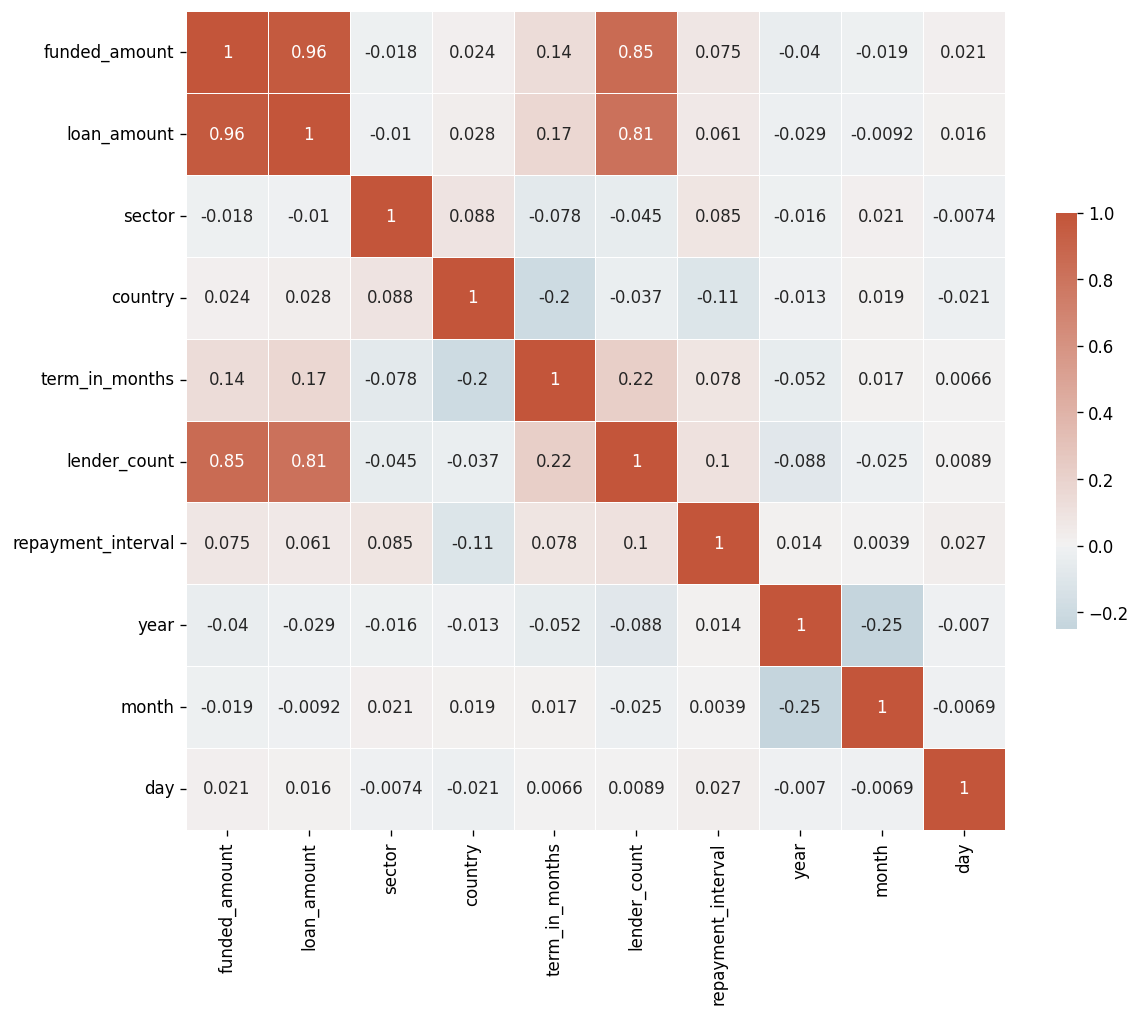

In [516]:
corr = df.corr()
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

# Splitting data

In [517]:
X = df.drop(columns=['funded_amount'])
y = df['funded_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Linear Regression Model

In [518]:
LRmodel = LinearRegression()
LRmodel.fit(X_train, y_train)
y_pred = LRmodel.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 71116.94381484616
R^2 Score: 0.9470593419834682


# Random Forest Regressor

In [519]:
RFmodel = RandomForestRegressor(n_estimators=100, random_state=42)
RFmodel.fit(X_train, y_train)
y_pred = RFmodel.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 24725.19242429472
R^2 Score: 0.9815941478034342


# Polynomial Regression

In [520]:
polymodel = PolynomialFeatures(degree=2, include_bias=False)
polyfeatures = polymodel.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    polyfeatures, y, test_size=0.3, random_state=42)

ployregressionmodel = LinearRegression()
ployregressionmodel.fit(X_train, y_train)

y_pred = ployregressionmodel.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 41101.501409322686
R^2 Score: 0.9694033459066795


# Make the date as index and sort it

In [521]:
maindf['date'] = pd.to_datetime(maindf['date'])
maindf.set_index('date', inplace=True)
maindf.sort_index(inplace=True)



In [522]:
maindf.head()

,funded_amount,loan_amount,sector,country,term_in_months,lender_count,repayment_interval
date,,,,,,,
2014-01-01,250,250,Retail,Pakistan,12,8,irregular
2014-01-02,1225,1225,Agriculture,Mongolia,18,49,monthly
2014-01-02,250,250,Agriculture,Kenya,13,10,irregular
2014-01-02,325,325,Retail,Liberia,11,9,irregular
2014-01-02,1200,1200,Personal Use,Peru,20,44,monthly


In [523]:
weekly_funded_amount = maindf['funded_amount']


# Replacing outliers with mean

In [524]:
Q1 = weekly_funded_amount.quantile(0.25)
Q3 = weekly_funded_amount.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
without_outliers=weekly_funded_amount[(weekly_funded_amount >= lower_bound) & (weekly_funded_amount <= upper_bound)]
without_outliers_mean = without_outliers.mean()
weekly_funded_amount = weekly_funded_amount.mask((weekly_funded_amount < lower_bound) | (weekly_funded_amount > upper_bound), without_outliers_mean)
# weekly_funded_amount.head()

# resample data into weeks

In [525]:
weekly_funded_amount = weekly_funded_amount.resample('w').sum()

In [526]:
# Q1 = weekly_funded_amount.quantile(0.25)
# Q3 = weekly_funded_amount.quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 - (1.5 * IQR)
# upper_bound = Q3 + (1.5 * IQR)
# without_outliers=weekly_funded_amount[(weekly_funded_amount >= lower_bound) & (weekly_funded_amount <= upper_bound)]
# without_outliers_mean = without_outliers.mean()
# weekly_funded_amount = weekly_funded_amount.mask((weekly_funded_amount < lower_bound) | (weekly_funded_amount > upper_bound), without_outliers_mean)
# # weekly_funded_amount.head()

In [527]:
weekly_funded_amount

date
2014-01-05    35929.613922
2014-01-12    58248.691138
2014-01-19    90801.996198
2014-01-26    86275.687335
2014-02-02    86015.150629
                  ...     
2017-06-25    85809.227844
2017-07-02    43634.227844
2017-07-09    23380.922784
2017-07-16     4750.000000
2017-07-23       25.000000
Freq: W-SUN, Name: funded_amount, Length: 186, dtype: float64

# Plot time series 

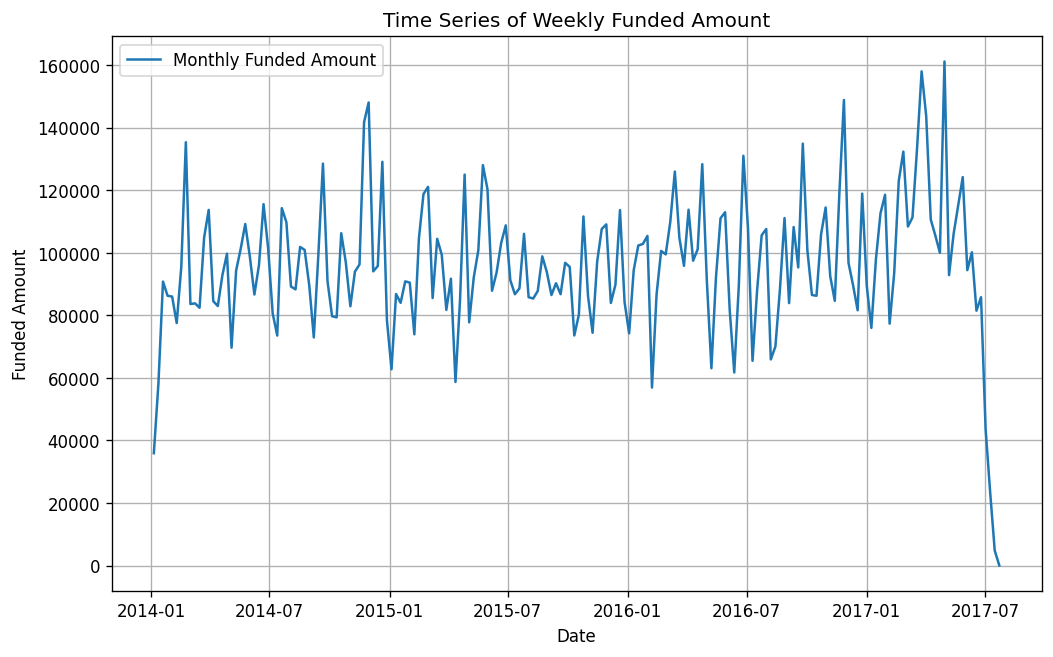

In [528]:
plt.figure(figsize=(10, 6))
plt.plot(weekly_funded_amount, label='Monthly Funded Amount')
plt.title('Time Series of Weekly Funded Amount')
plt.xlabel('Date')
plt.ylabel('Funded Amount')
plt.legend()
plt.grid(True)
plt.show()

In [529]:
weekly_funded_amount = weekly_funded_amount[~((weekly_funded_amount.index.month == 7) & (weekly_funded_amount.index.year == 2017))]
weekly_funded_amount = weekly_funded_amount[~((weekly_funded_amount.index.month == 6) & (weekly_funded_amount.index.year == 2017))]


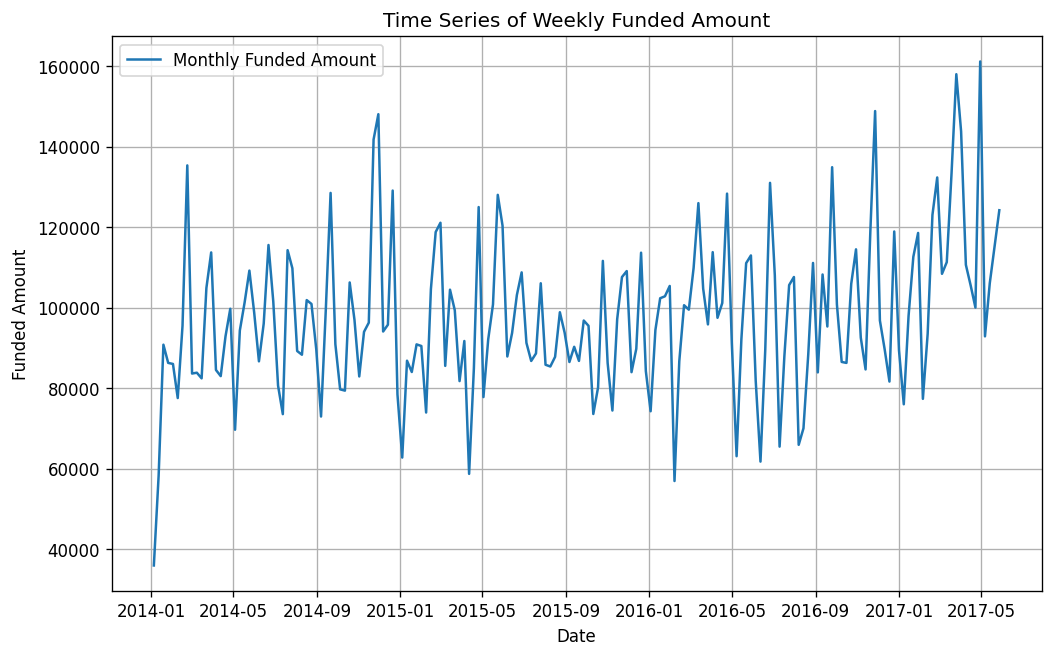

In [530]:
plt.figure(figsize=(10, 6))
plt.plot(weekly_funded_amount, label='Monthly Funded Amount')
plt.title('Time Series of Weekly Funded Amount')
plt.xlabel('Date')
plt.ylabel('Funded Amount')
plt.legend()
plt.grid(True)
plt.show()

# Calculating the adfuller with different diff

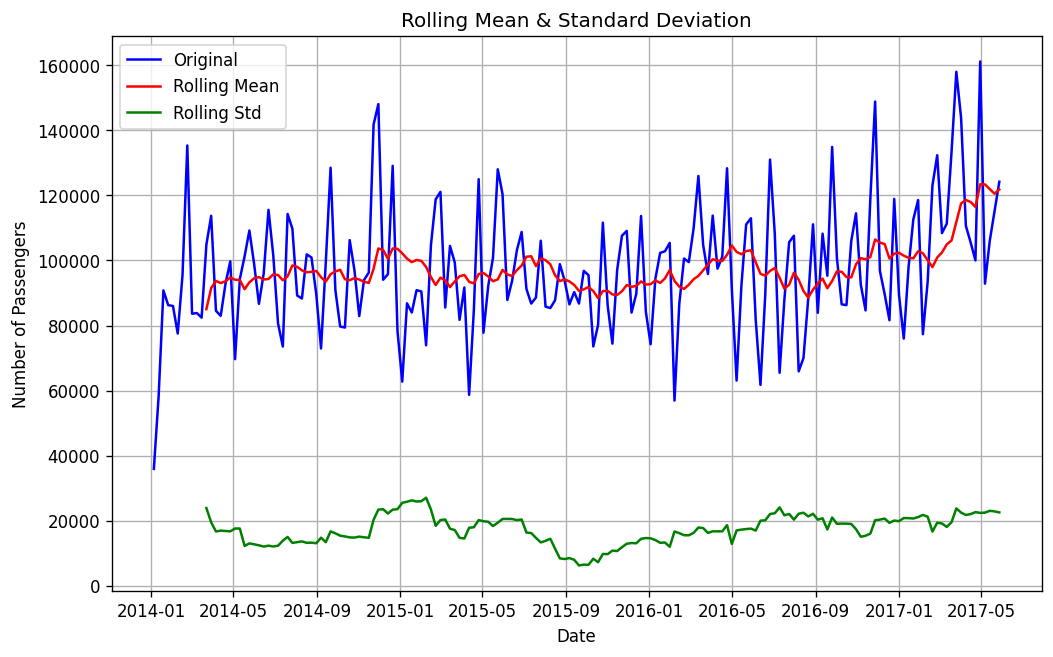

ADF Statistic: -1.3126199990254506
p-value: 0.6233790533984362
Critical Values:
	1%: -3.47086589632514
	5%: -2.879330279087651
	10%: -2.57625492712671


In [531]:

def stationarize_series(series):
    # Calculate rolling statistics
    rolling_mean = series.rolling(window=12).mean()
    rolling_std = series.rolling(window=12).std()

    # Plot rolling statistics
    plt.figure(figsize=(10, 6))
    plt.plot(series, label='Original', color='blue')
    plt.plot(rolling_mean, label='Rolling Mean', color='red')
    plt.plot(rolling_std, label='Rolling Std', color='green')
    plt.title('Rolling Mean & Standard Deviation')
    plt.xlabel('Date')
    plt.ylabel('Number of Passengers')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

    # Perform Dickey-Fuller test
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')
stationarize_series(weekly_funded_amount)

# Diff 1

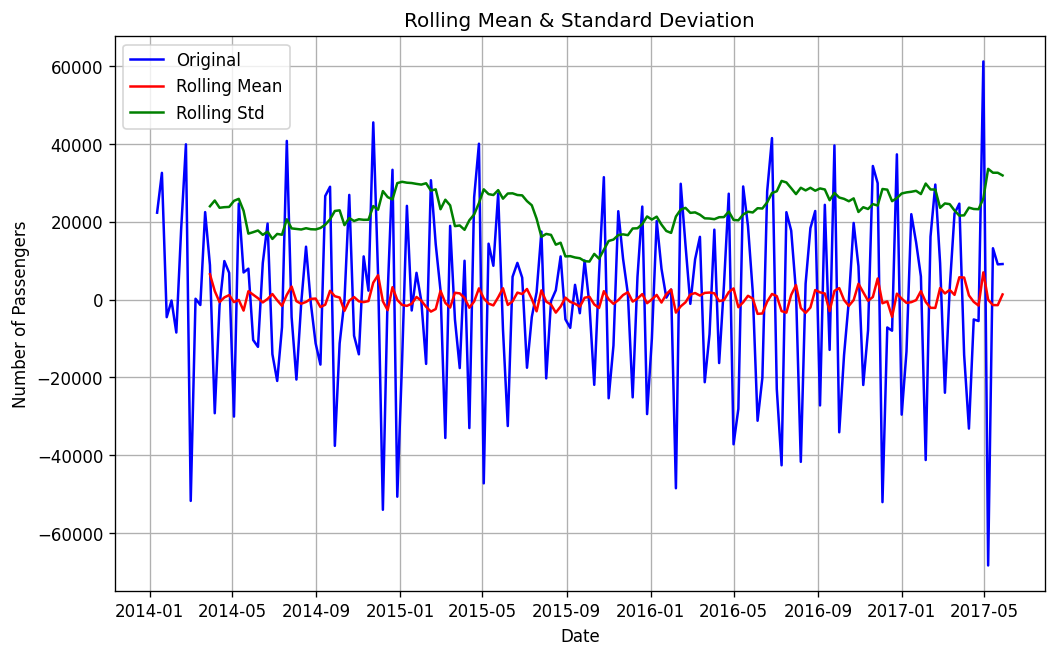

ADF Statistic: -5.926928837984182
p-value: 2.4312827679184677e-07
Critical Values:
	1%: -3.47086589632514
	5%: -2.879330279087651
	10%: -2.57625492712671


In [532]:

stationarize_series(weekly_funded_amount.diff().dropna())

# Diff 2

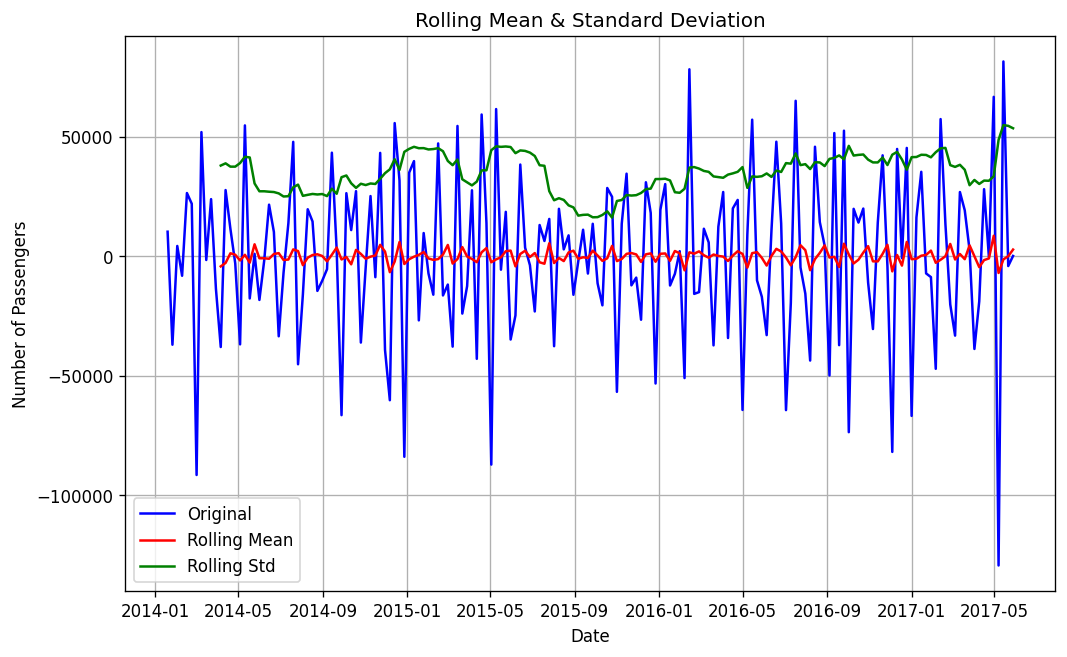

ADF Statistic: -7.8500862172821435
p-value: 5.631564313836575e-12
Critical Values:
	1%: -3.471374345647024
	5%: -2.8795521079291966
	10%: -2.5763733302850174


In [533]:
stationarize_series(weekly_funded_amount.diff().diff().dropna())



# time series in different orders

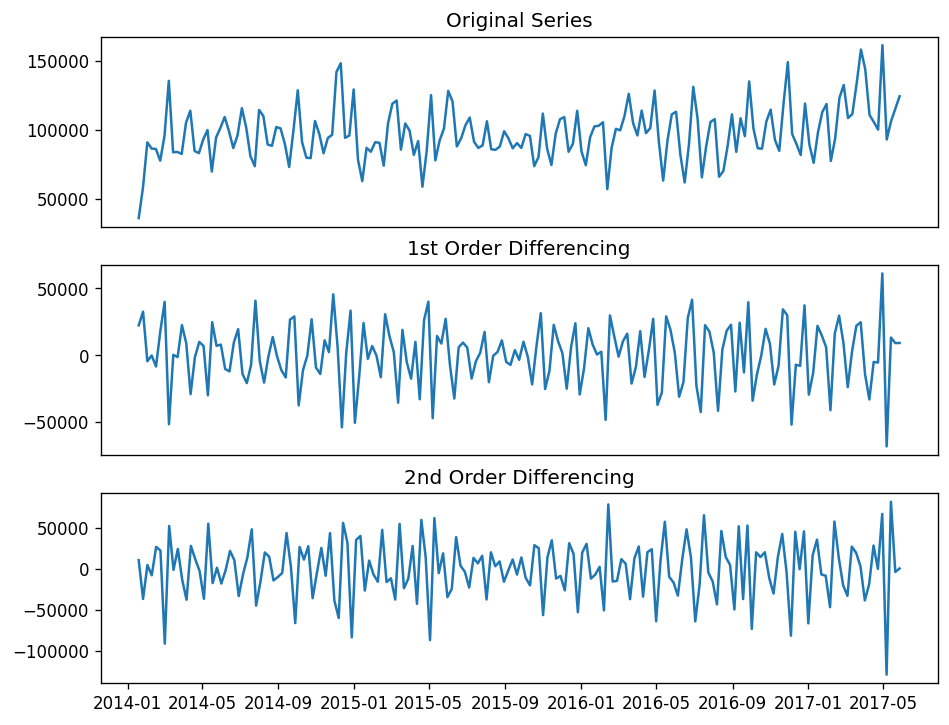

In [534]:
plt.rcParams.update({'figure.figsize': (9, 7), 'figure.dpi': 120})
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(weekly_funded_amount)
ax1.set_title('Original Series')
ax1.axes.xaxis.set_visible(False)
ax2.plot(weekly_funded_amount.diff())
ax2.set_title('1st Order Differencing')
ax2.axes.xaxis.set_visible(False)
ax3.plot(weekly_funded_amount.diff().diff())
ax3.set_title('2nd Order Differencing')
plt.show()

# Seeing trend and seasonal data for different orders of diff

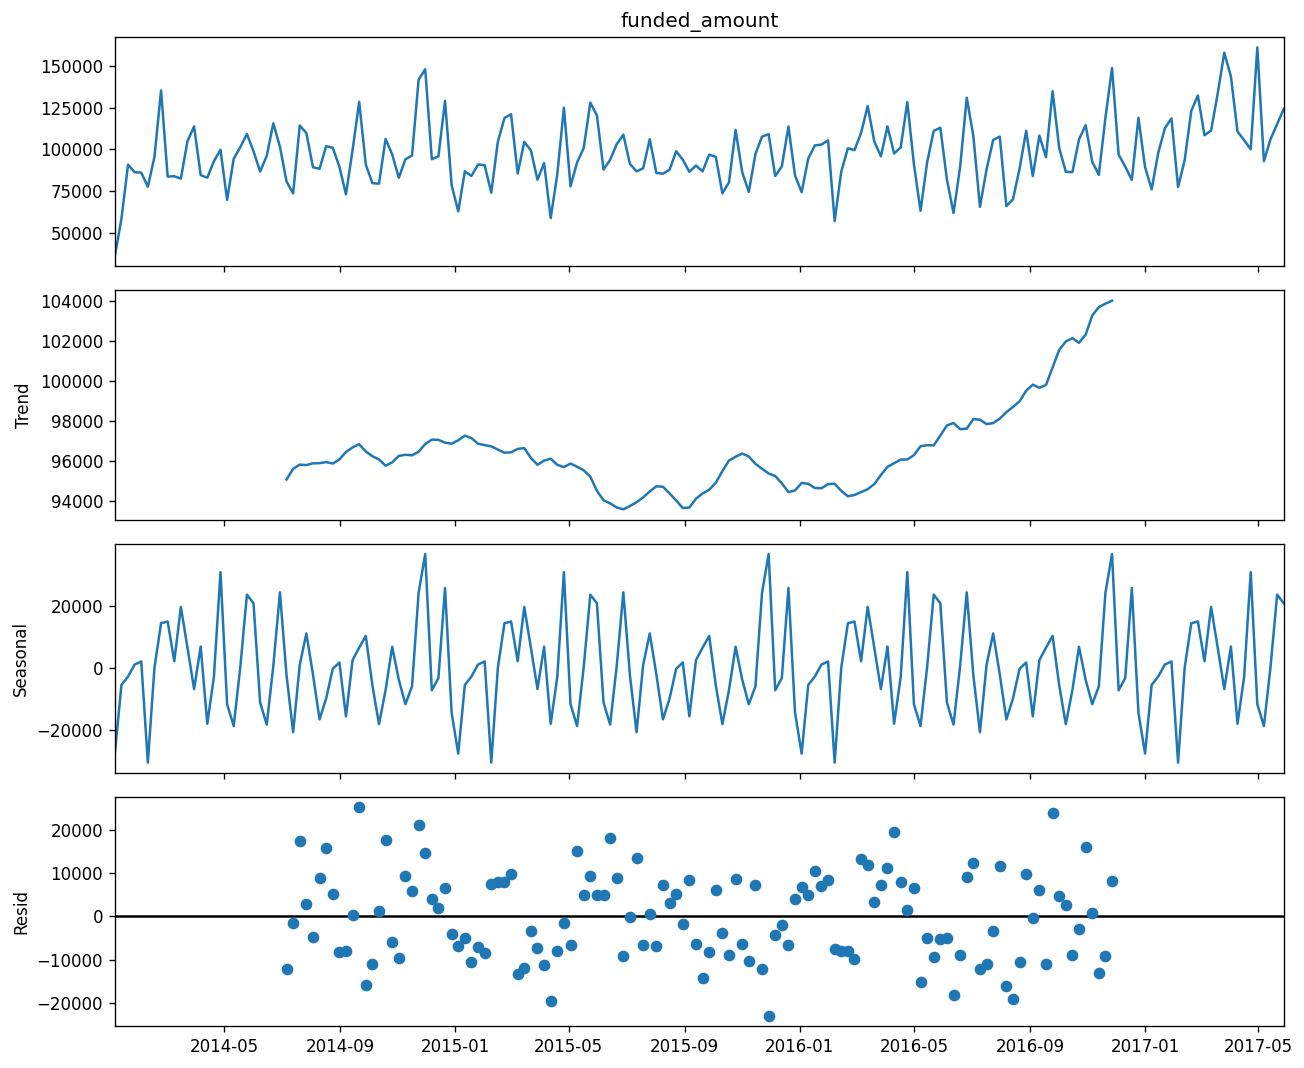

In [535]:

decomposition = sm.tsa.seasonal_decompose(weekly_funded_amount)
rcParams['figure.figsize']= 11,9

fig= decomposition.plot()
plt.show()



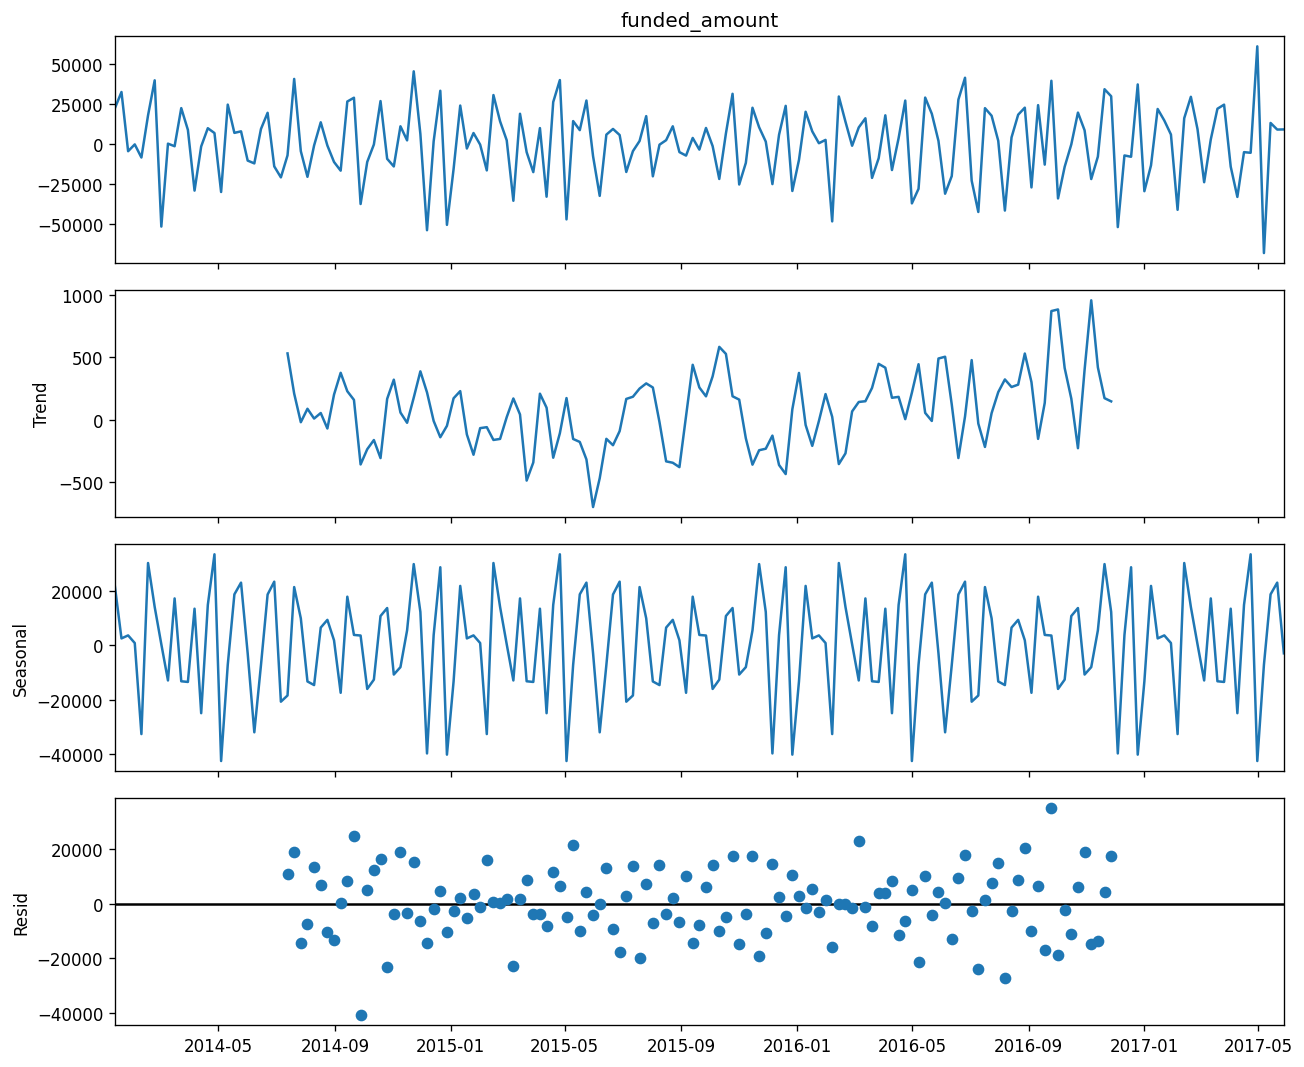

In [536]:

decomposition = sm.tsa.seasonal_decompose(weekly_funded_amount.diff().dropna())
rcParams['figure.figsize']= 11,9

fig= decomposition.plot()
plt.show()

# Acf plot for different orders of diff

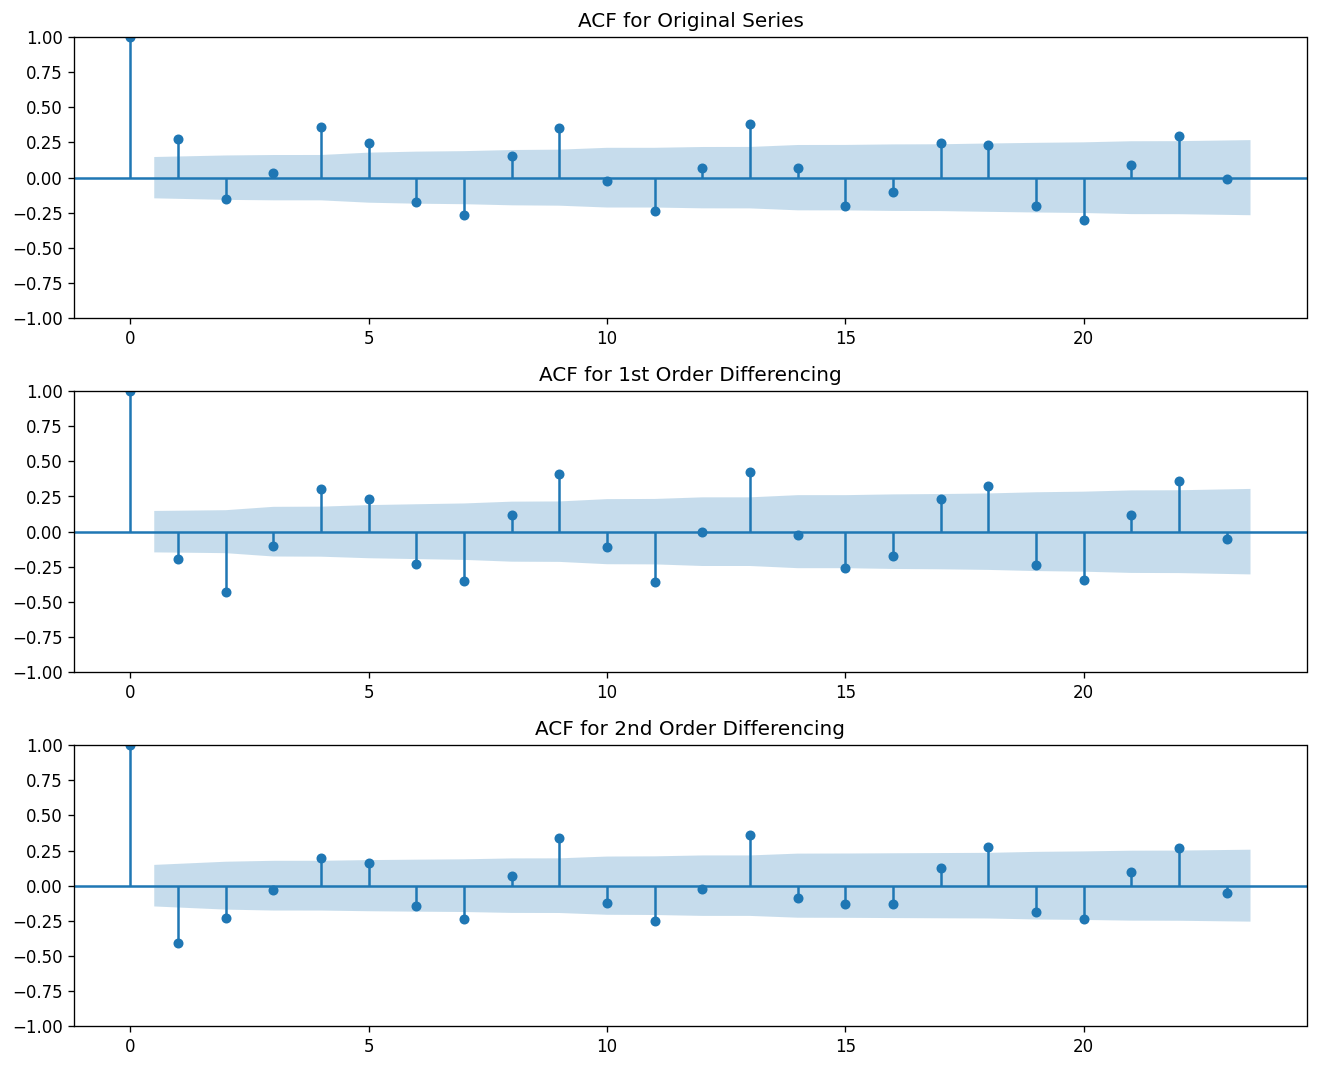

In [537]:



fig, (ax1, ax2, ax3) = plt.subplots(3)

plot_acf(weekly_funded_amount, ax=ax1)
ax1.set_title('ACF for Original Series')

plot_acf(weekly_funded_amount.diff().dropna(), ax=ax2)
ax2.set_title('ACF for 1st Order Differencing')

plot_acf(weekly_funded_amount.diff().diff().dropna(), ax=ax3)
ax3.set_title('ACF for 2nd Order Differencing')

plt.tight_layout()
plt.show()


# Pacf plot for 1st diff

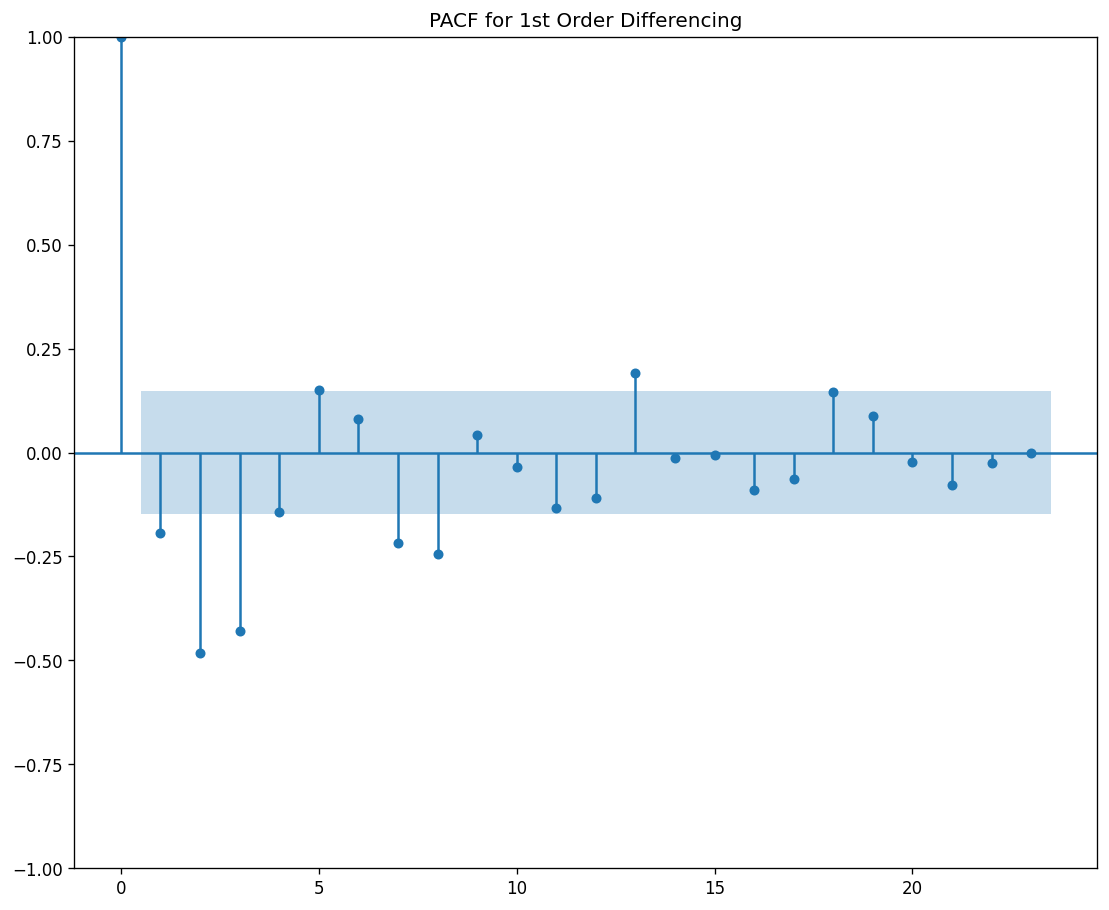

In [538]:
fig, ax = plt.subplots()

plot_pacf(weekly_funded_amount.diff().dropna(), ax=ax)
ax.set_title('PACF for 1st Order Differencing')

plt.show()


# Acf plot for 1st diff

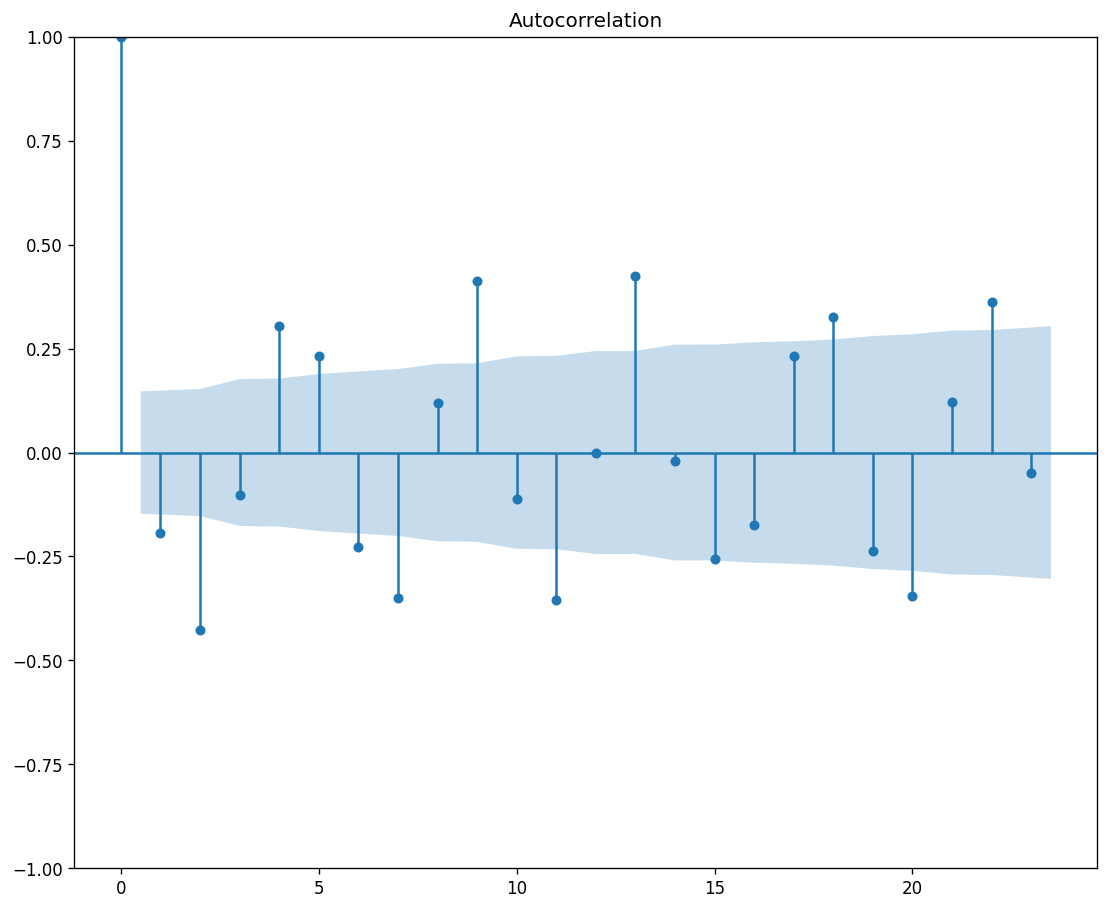

In [539]:
fig, ax = plt.subplots()  
plot_acf(weekly_funded_amount.diff().dropna(), ax=ax)  
plt.show()  




# Split data 

In [540]:
train_size = int(len(weekly_funded_amount) * 0.8)
train, test = weekly_funded_amount[:train_size], weekly_funded_amount[train_size:]

# trying to get the best orders 

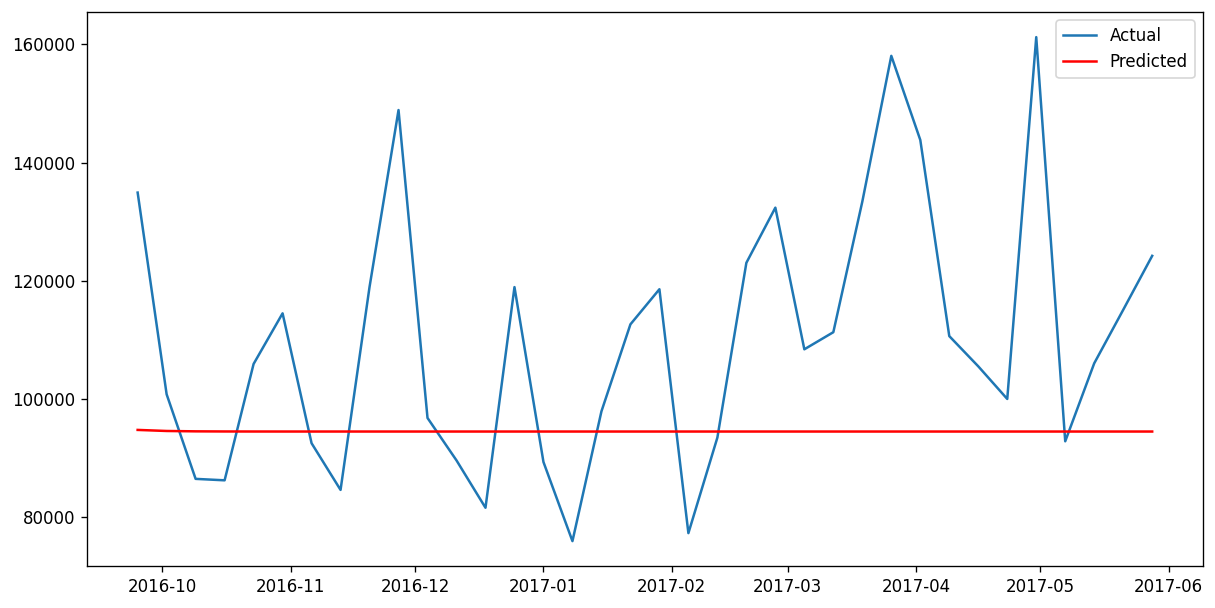

RMSE: 26527.353327785295
1       1


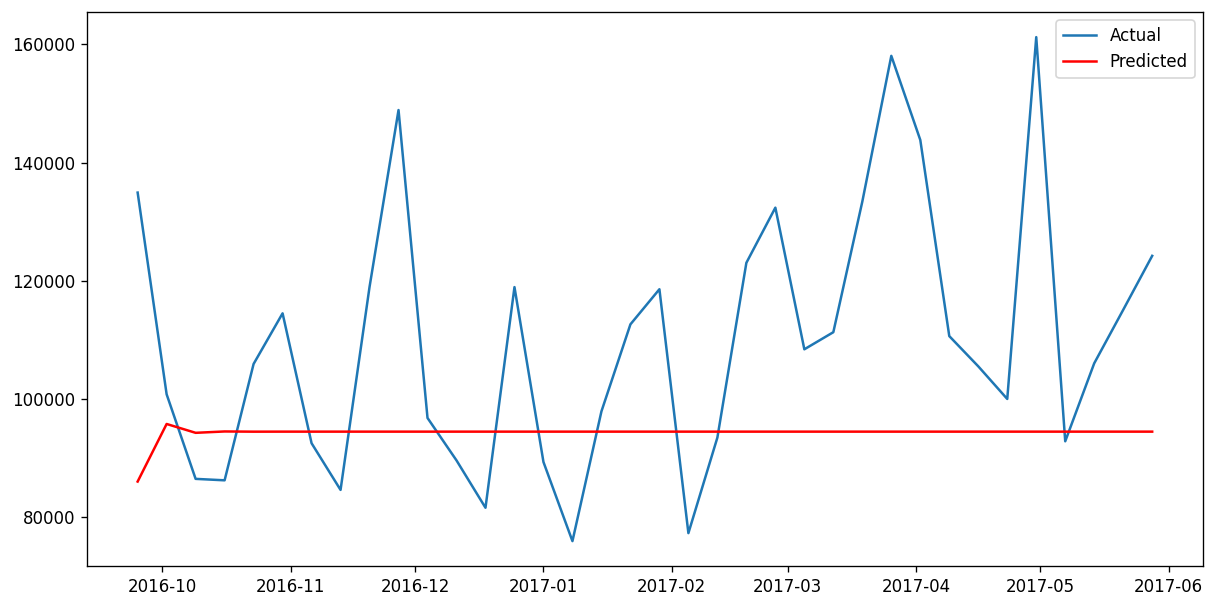

RMSE: 26932.393079615016
1       2


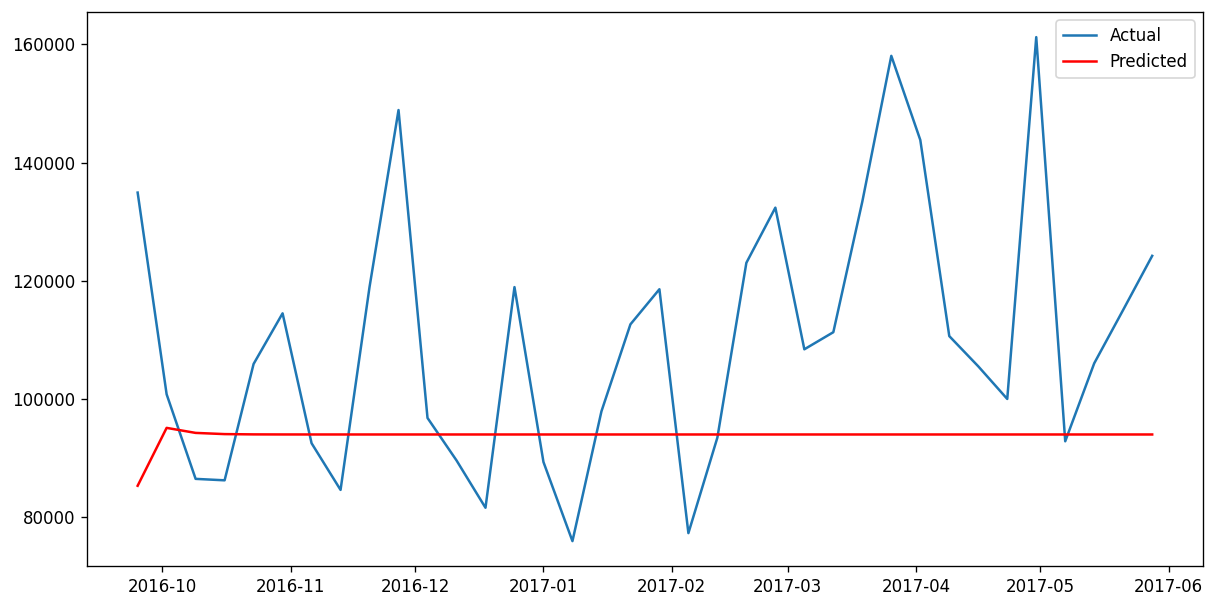

RMSE: 27227.34461824445
1       3


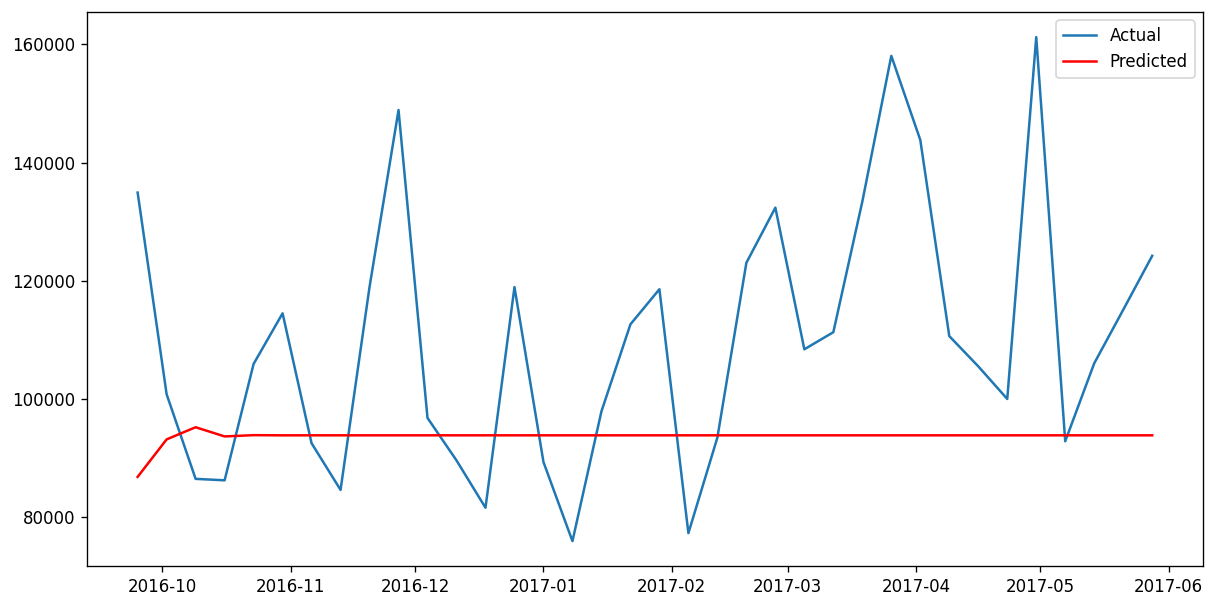

RMSE: 27247.60299183719
1       4


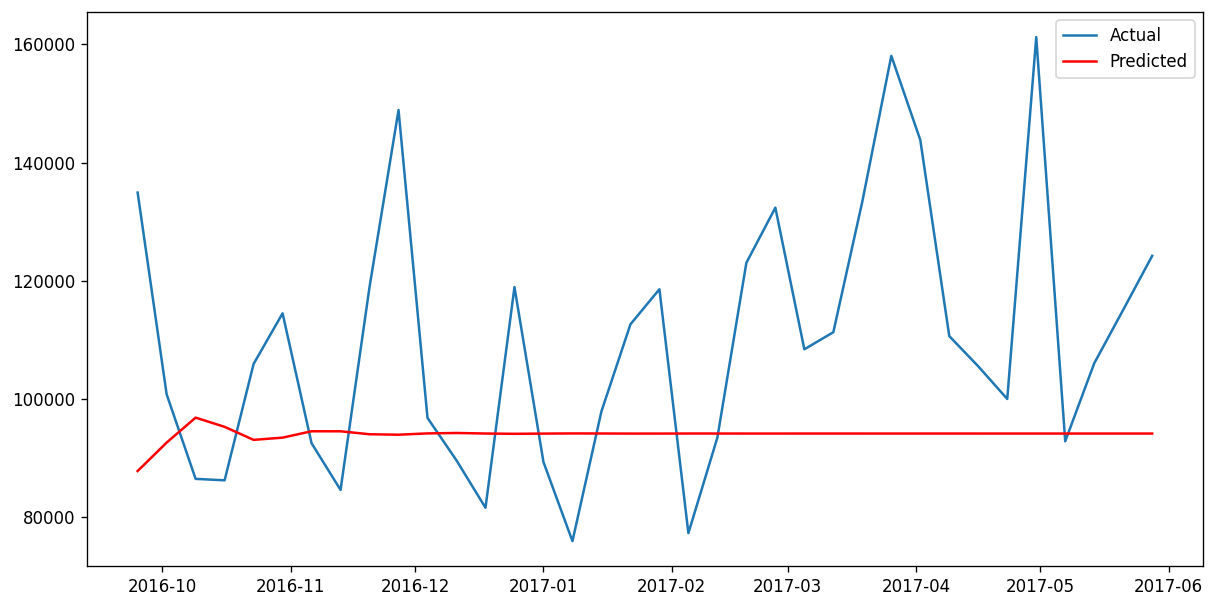

RMSE: 27119.59426836345
2       1


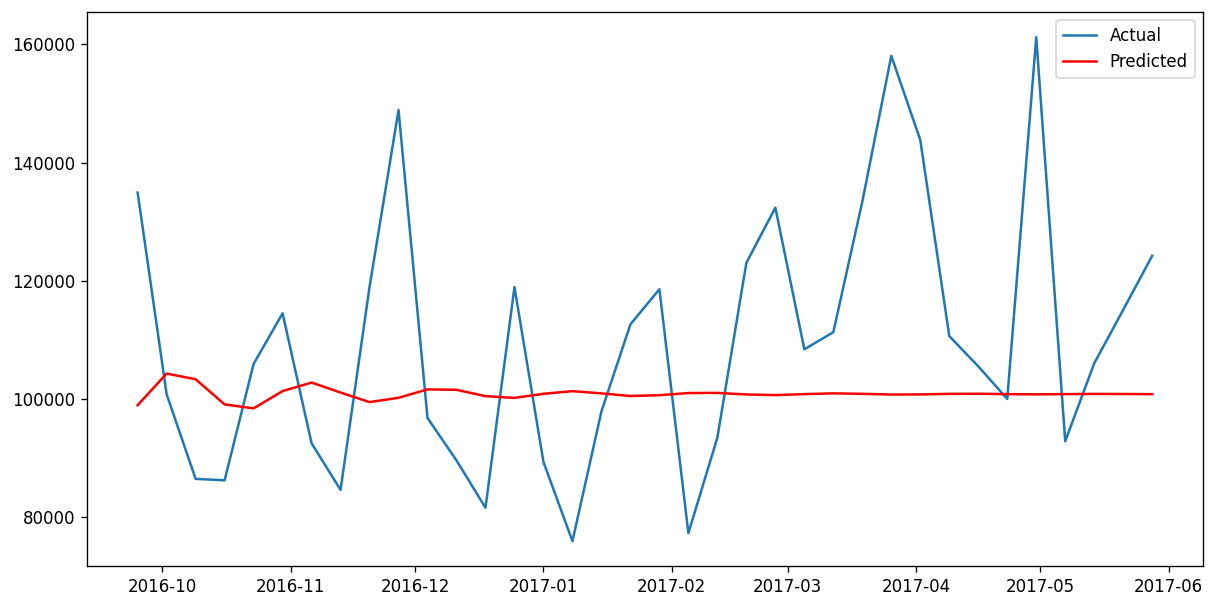

RMSE: 23745.87173603585
2       2


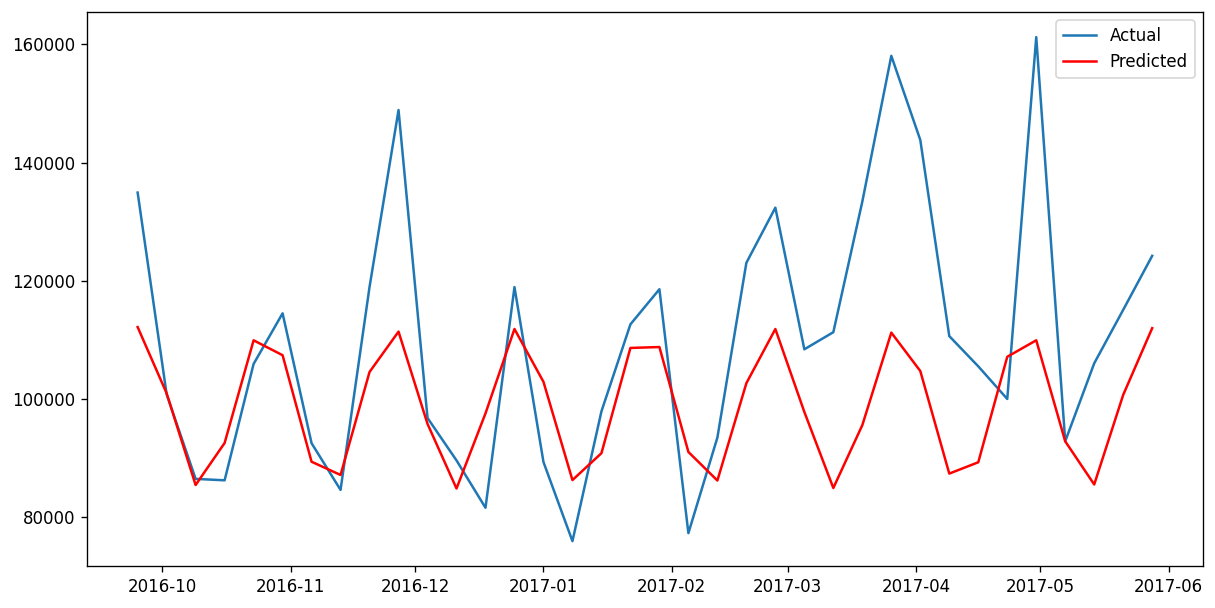

RMSE: 19938.767776249246
2       3


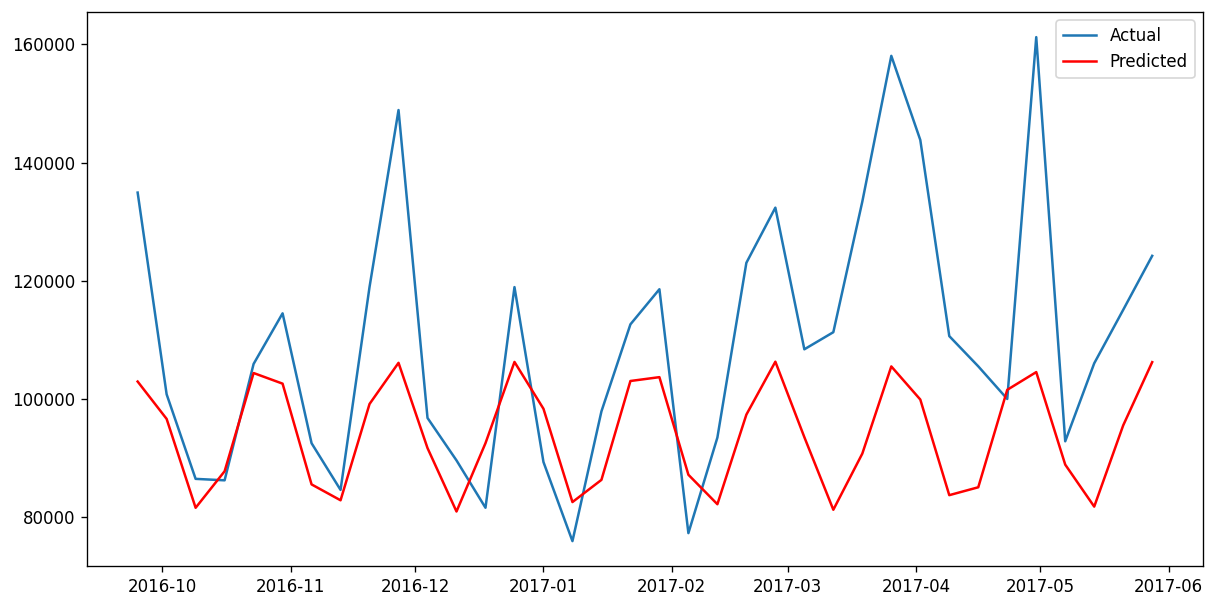

RMSE: 23132.98837496173
2       4


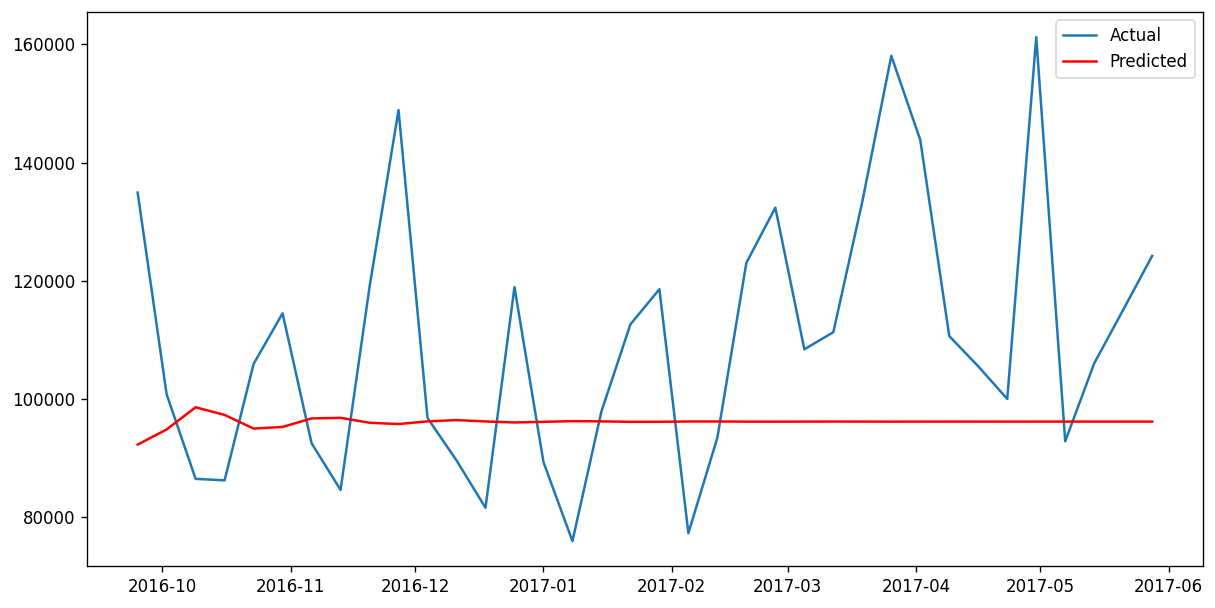

RMSE: 25909.219760018445
3       1


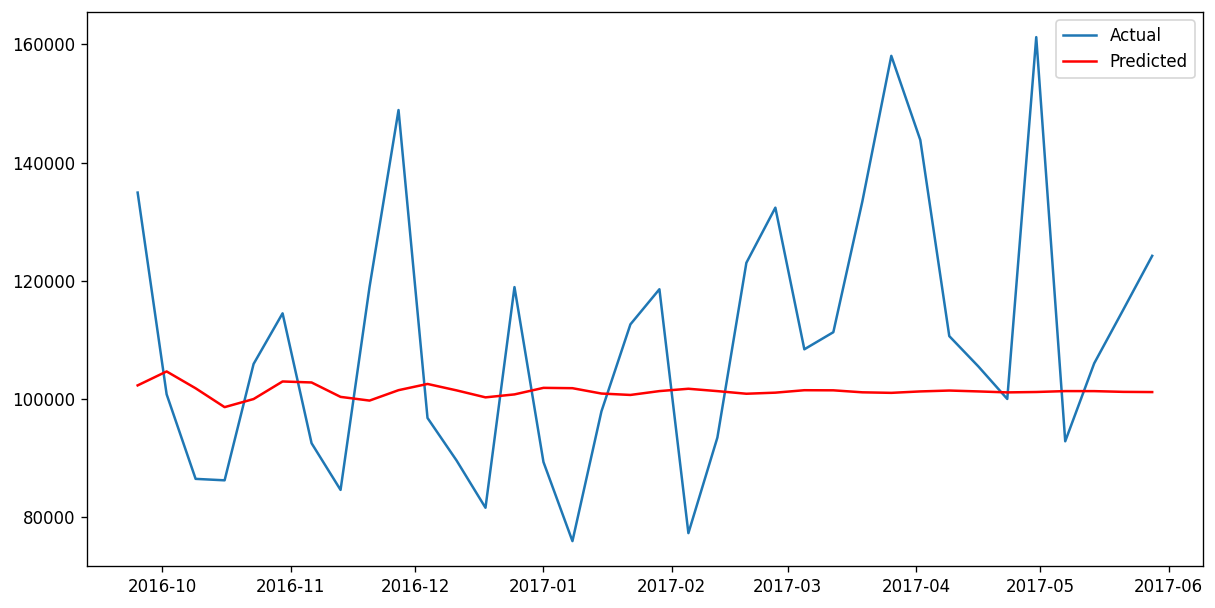

RMSE: 23335.56578467486
3       2


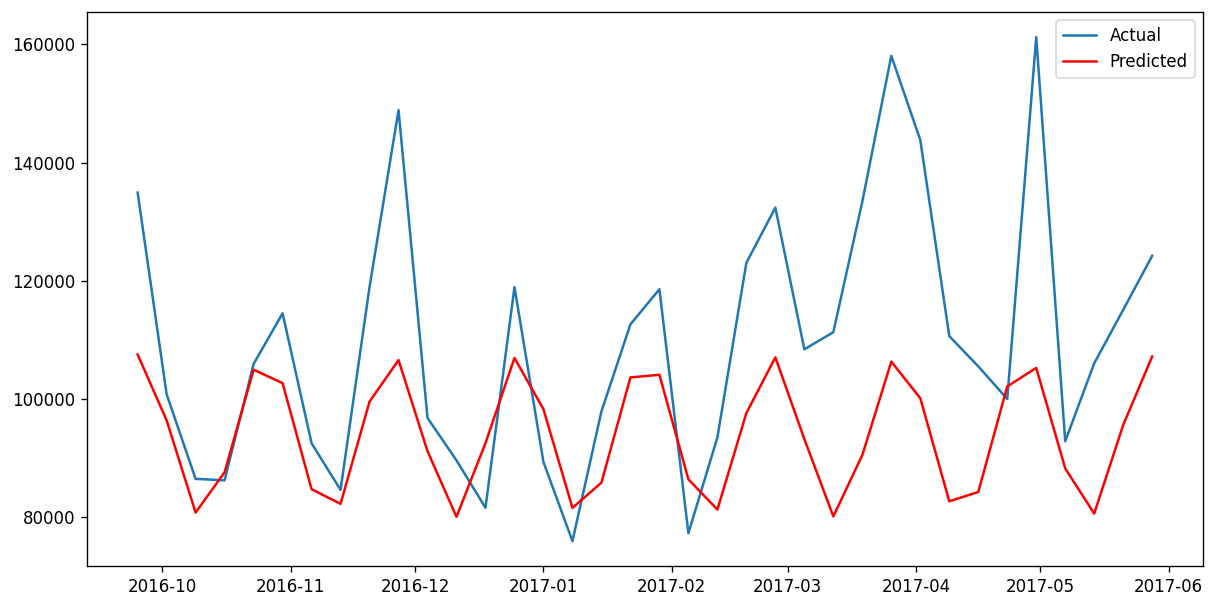

RMSE: 22932.86914830744
3       3


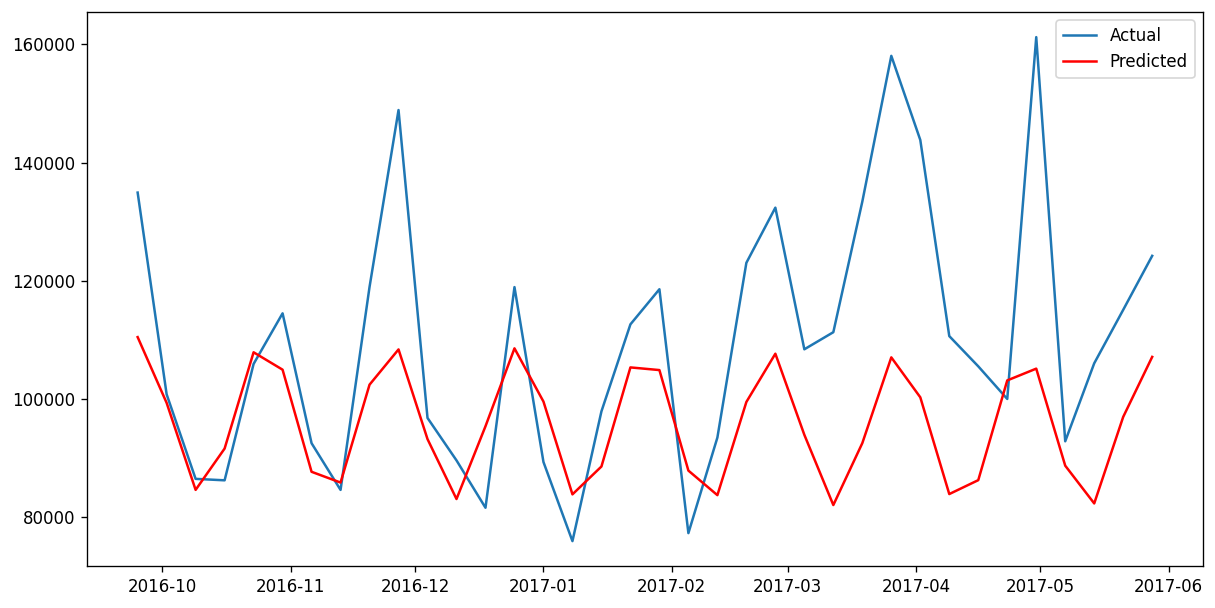

RMSE: 22066.482122936828
3       4


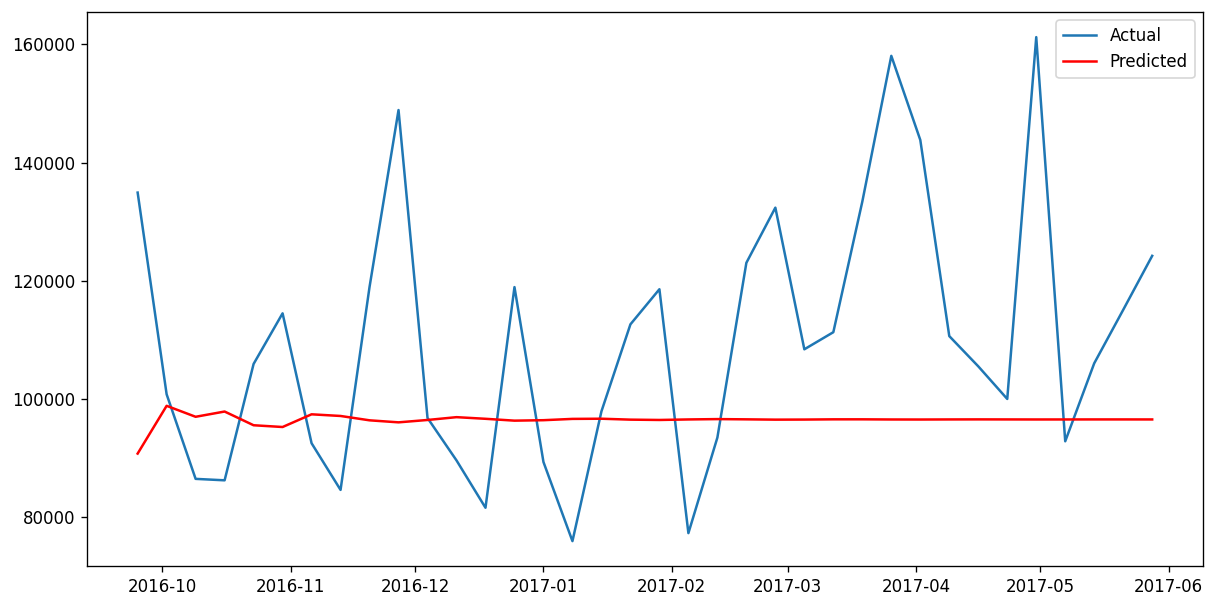

RMSE: 25784.674911315946
4       1


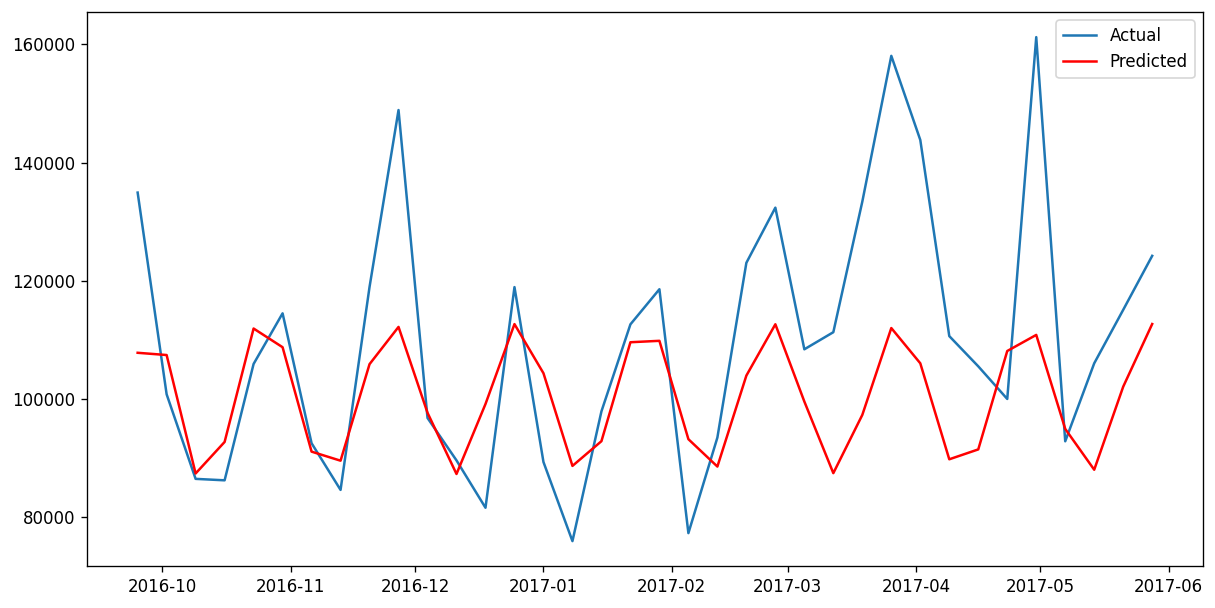

RMSE: 19478.52749291347
4       2


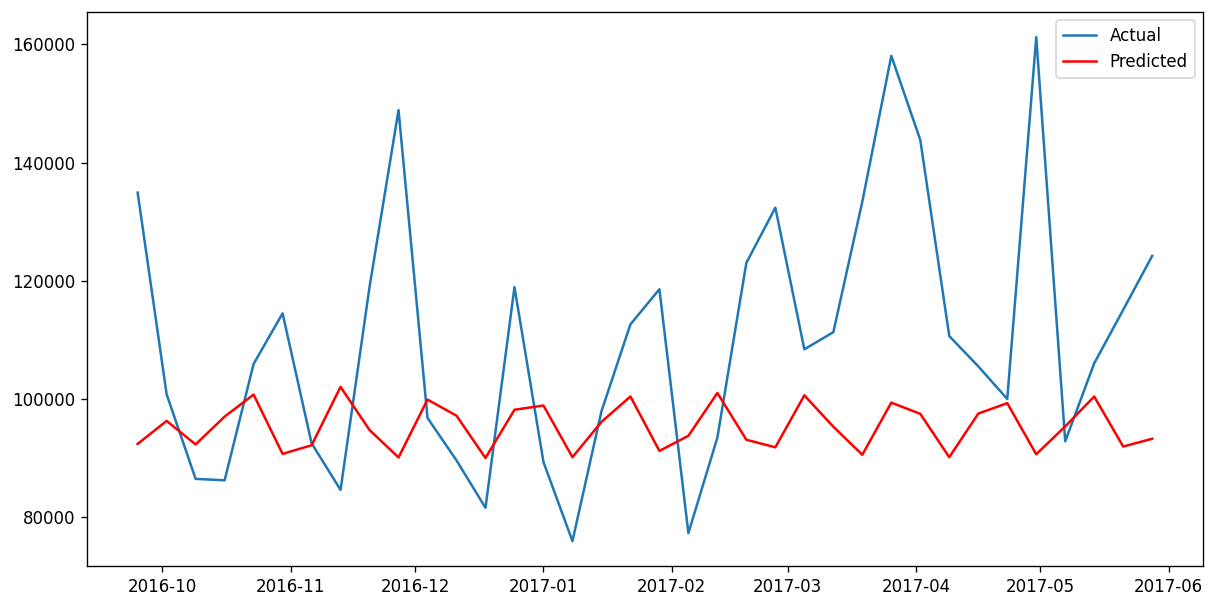

RMSE: 26998.548621535003
4       3


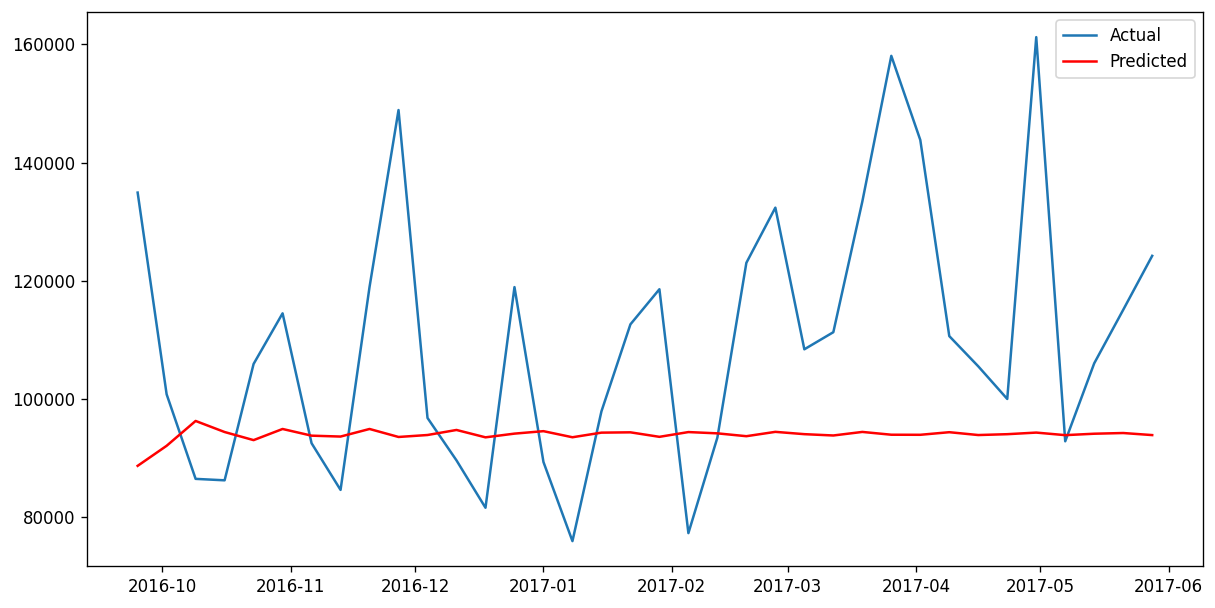

RMSE: 27043.84549873836
4       4


In [541]:
for i in range(1,5):
    for  k in range (1,5):
            model = ARIMA(train, order=(i,1,k))
            arima_model = model.fit()
            predictions = arima_model.predict(start=len(train), end=len(weekly_funded_amount)-1, typ='levels')
            from sklearn.metrics import mean_squared_error
            mse = mean_squared_error(test, predictions)
            rmse = np.sqrt(mse)
            plt.figure(figsize=(12, 6))
            plt.plot(test.index, test, label='Actual')
            plt.plot(test.index, predictions, label='Predicted', color='red')
            plt.legend()
            plt.show()
            print(f'RMSE: {rmse}')
            print(i,"     ",k)

# Model fit

In [542]:
model = ARIMA(weekly_funded_amount, order=(2,1,3))
arima_model = model.fit()
forecast = arima_model.predict()

# Time series with forcast

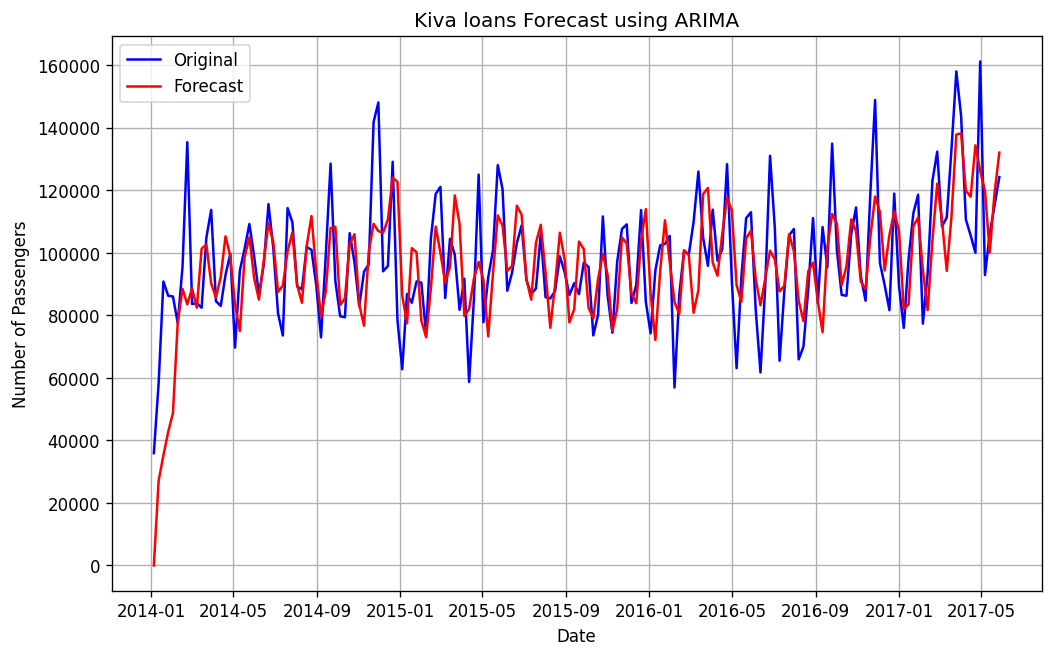

In [543]:
# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot( weekly_funded_amount.index,weekly_funded_amount.values, label='Original', color='blue')
plt.plot( weekly_funded_amount.index,forecast, label='Forecast', color='red')
plt.title('Kiva loans Forecast using ARIMA')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [544]:
# for i in range(0,6):
#     for  k in range (0,6):
#         for j in range (0,4):
#             model = ARIMA(weekly_funded_amount, order=(i,j,k))
#             arima_model = model.fit()
#             forecast = arima_model.predict()
#             start_index = '2017-8-1'
#             end_index = '2019-12-30'
#             forecast = arima_model.predict(start=start_index, end=end_index, dynamic=False)
#             predicted=forecast
#             monthly=weekly_funded_amount
#             print(i,"  ",j,"  ",k)
#             plt.figure(figsize=(10, 6))
#             plt.plot(monthly.index, monthly.values, label='Original', color='blue')
#             plt.plot(pd.date_range(start=monthly.index[-1], periods=len(predicted), freq='MS'), predicted, label='Forecast', color='red')

#             plt.title('Airline Passengers Forecast using ARIMA')
#             plt.xlabel('Date')

#             plt.ylabel('Number of Passengers')
#             plt.legend(loc='best')

#             plt.grid(True)
#             plt.show()

# Seeing the last date we have

In [545]:
weekly_funded_amount.tail(n=10)

date
2017-03-26    158027.683533
2017-04-02    143806.610120
2017-04-09    110651.996198
2017-04-16    105540.150629
2017-04-23    100024.378473
2017-04-30    161194.764551
2017-05-07     92872.382276
2017-05-14    106051.996198
2017-05-21    115093.455689
2017-05-28    124219.764551
Freq: W-SUN, Name: funded_amount, dtype: float64

# Assign our start and end indexes we need in forcast

In [555]:
start_index = '2017-5-29'
end_index = '2019-12-23'

# Predict new data

In [556]:
forecast = arima_model.predict(start=start_index, end=end_index, dynamic=False)
predicted=forecast
monthly=weekly_funded_amount

# visualizing new data compared of old data

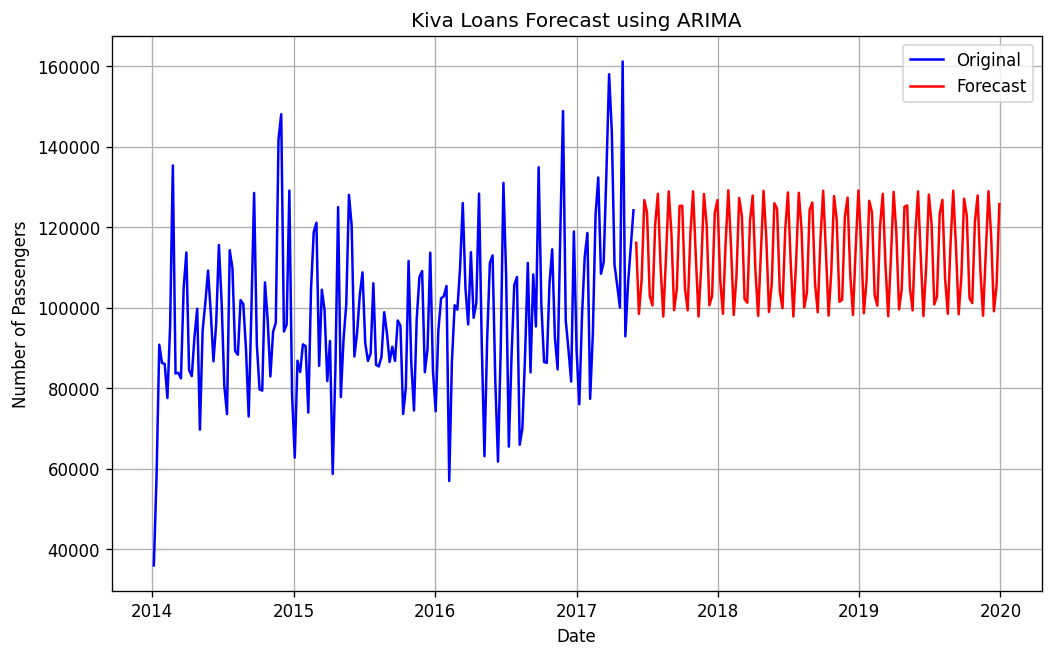

In [557]:
plt.figure(figsize=(10, 6))
plt.plot(monthly.index, monthly.values, label='Original', color='blue')
plt.plot(pd.date_range(start=start_index, end='2020-1-1', freq='W-SUN'), predicted, label='Forecast', color='red')

plt.title('Kiva Loans Forecast using ARIMA')
plt.xlabel('Date')

plt.ylabel('Number of Passengers')
plt.legend(loc='best')

plt.grid(True)
plt.show()

# Resample data into months to give us better visualize 

In [558]:
predicted=forecast.resample("M").sum()
monthly=weekly_funded_amount.resample('M').sum()

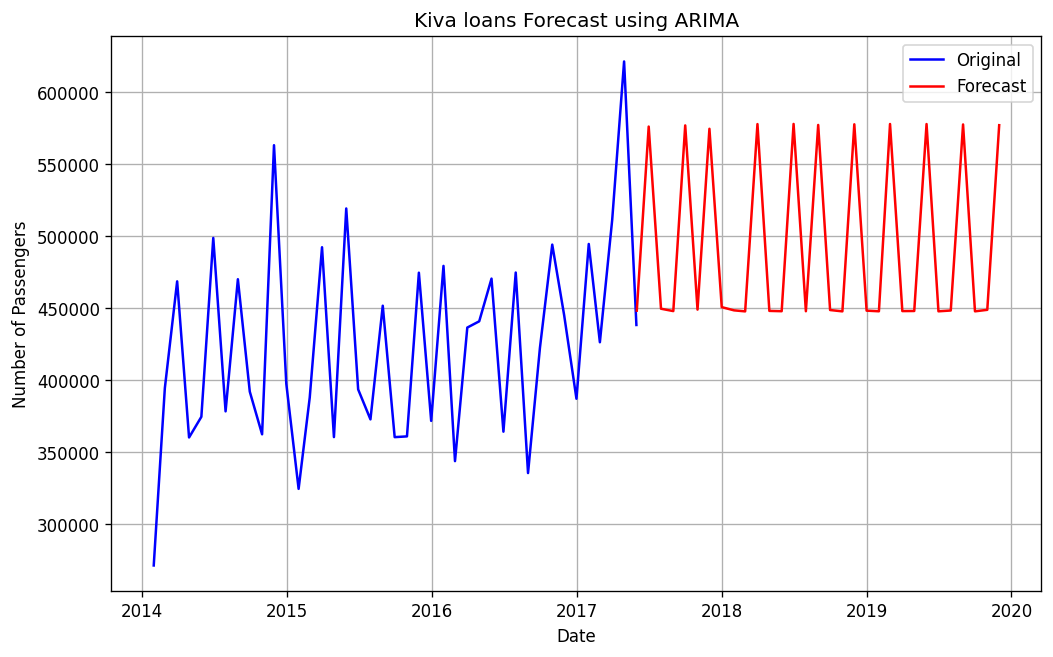

In [559]:
plt.figure(figsize=(10, 6))

plt.plot(monthly.index, monthly.values, label='Original', color='blue')
plt.plot(pd.date_range(start=monthly.index[-1], periods=len(predicted), freq='MS'), predicted, label='Forecast', color='red')

plt.title('Kiva loans Forecast using ARIMA')
plt.xlabel('Date')

plt.ylabel('Number of Passengers')
plt.legend(loc='best')

plt.grid(True)
plt.show()